In [1]:
import pandas as pd
import csv
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import hvplot.pandas as hvplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
tickers_data = Path("senators_data.csv")
tickers_data_df = pd.read_csv(tickers_data, infer_datetime_format=True, parse_dates=True)

tickers_data_df

,transaction_date,owner,ticker,asset_type,type,amount,state,industry,senator
0,4/18/2023,Spouse,ESS,Stock,Sale (Full),"$15,000",RI,Real Estate Investment Trusts,Sheldon Whitehouse
1,4/18/2023,Self,ESS,Stock,Sale (Full),"$15,000",RI,Real Estate Investment Trusts,Sheldon Whitehouse
2,5/16/2023,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Michael F. Bennet
3,4/4/2023,Spouse,UPS,Stock,Sale (Full),"$15,000",WV,Trucking Freight/Courier Services,Shelley Moore Capito
4,4/4/2023,Spouse,MCD,Stock,Sale (Partial),"$15,000",WV,Restaurants,Shelley Moore Capito
...,...,...,...,...,...,...,...,...,...
8441,8/17/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Sheldon Whitehouse
8442,8/16/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Pat Roberts
8443,8/15/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Rob Portman
8444,8/2/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Thomas R. Carper


Find the specific tickers that each senator is trading and bring in data for those tickers

Senator, date, amount, ticker, type

In [3]:
tickers_df_dropped=tickers_data_df.dropna()
tickers_df_dropped.head

<bound method NDFrame.head of      transaction_date   owner ticker asset_type            type     amount  \
0           4/18/2023  Spouse    ESS      Stock     Sale (Full)   $15,000    
1           4/18/2023    Self    ESS      Stock     Sale (Full)   $15,000    
3            4/4/2023  Spouse    UPS      Stock     Sale (Full)   $15,000    
4            4/4/2023  Spouse    MCD      Stock  Sale (Partial)   $15,000    
5            4/4/2023  Spouse    DUK      Stock     Sale (Full)   $50,000    
...               ...     ...    ...        ...             ...        ...   
7627        1/16/2015    Self    NOG      Stock        Purchase   $50,000    
7628         1/6/2015    Self    FCX      Stock     Sale (Full)  $100,000    
7640       12/12/2014  Spouse    XOM      Stock     Sale (Full)   $15,000    
7641       12/19/2014  Spouse     BA      Stock        Purchase   $15,000    
7642       12/12/2014  Spouse    BAC      Stock     Sale (Full)   $15,000    

     state                       

In [4]:
tickers_df=pd.DataFrame(tickers_df_dropped)
# tickers_df

tickers_df=tickers_df[['transaction_date', 'ticker', 'type', 'amount', 'senator']]
display(tickers_df)

,transaction_date,ticker,type,amount,senator
0,4/18/2023,ESS,Sale (Full),"$15,000",Sheldon Whitehouse
1,4/18/2023,ESS,Sale (Full),"$15,000",Sheldon Whitehouse
3,4/4/2023,UPS,Sale (Full),"$15,000",Shelley Moore Capito
4,4/4/2023,MCD,Sale (Partial),"$15,000",Shelley Moore Capito
5,4/4/2023,DUK,Sale (Full),"$50,000",Shelley Moore Capito
...,...,...,...,...,...
7627,1/16/2015,NOG,Purchase,"$50,000",John Hoeven
7628,1/6/2015,FCX,Sale (Full),"$100,000",John Hoeven
7640,12/12/2014,XOM,Sale (Full),"$15,000",Pat Roberts
7641,12/19/2014,BA,Purchase,"$15,000",Pat Roberts


In [5]:
tickers_counts=tickers_df['ticker'].value_counts()
msft_counts=tickers_counts['MSFT']


msft_counts

96

In [6]:
most_common_ticker=tickers_df['ticker'].value_counts().head(5)
most_common_ticker

AAPL    168
MSFT     96
BAC      81
DIS      79
PFE      77
Name: ticker, dtype: int64

Bring in daily close for AAPL for every transaction, iterate through list and bring in daily close price for transaction date and 30 days into the future.

In [7]:
msft_filtered_df=tickers_df[(tickers_df['ticker']=='MSFT') & (tickers_df['amount'])]
# display(msft_filtered_df)

aapl_filtered_df=tickers_df[(tickers_df['ticker']=='AAPL') & (tickers_df['amount'])]
# display(aapl_filtered_df)

bac_filtered_df=tickers_df[(tickers_df['ticker']=='BAC') & (tickers_df['amount'])]
# display(bac_filtered_df)

dis_filtered_df=tickers_df[(tickers_df['ticker']=='DIS') & (tickers_df['amount'])]
# display(dis_filtered_df)

pfe_filtered_df=tickers_df[(tickers_df['ticker']=='PFE') & (tickers_df['amount'])]
# display(pfe_filtered_df)

combined_data=pd.concat([msft_filtered_df, aapl_filtered_df, bac_filtered_df, dis_filtered_df, pfe_filtered_df], axis=0)
display(combined_data)


,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
301,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
309,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
...,...,...,...,...,...
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7326,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [8]:
dup_drop=combined_data.drop_duplicates()
dup_drop

,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
323,11/23/2022,MSFT,Sale (Full),"$50,000",Tommy Tuberville
324,11/23/2022,MSFT,Purchase,"$15,000",Tommy Tuberville
...,...,...,...,...,...
6963,9/16/2015,PFE,Purchase,"$15,000",Gary C. Peters
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [9]:
ready_csv_data=dup_drop.dropna()#.set_index('transaction_date')
display(ready_csv_data)



,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
323,11/23/2022,MSFT,Sale (Full),"$50,000",Tommy Tuberville
324,11/23/2022,MSFT,Purchase,"$15,000",Tommy Tuberville
...,...,...,...,...,...
6963,9/16/2015,PFE,Purchase,"$15,000",Gary C. Peters
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


This is the API for stock data that I will concat to the existing df, I will iterate through each row and input the ticker symbol into the API 

Use top 5 tickers invested

In [10]:
# duration=180
# for idx, row in senator_trades_df.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
#     df_in_timeframe=yf_data.loc[start:start+duration, ticker]
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     senator_trades_df.loc[idx, f'{duration}_days_return']=return_in_timeframe

Concat the 5 tickers close prices into one df and input into the for loop for yf_data

In [11]:
import yfinance as yf
from datetime import datetime, timedelta

# 6 years of data
nine_year_end_date = datetime.today()
nine_year_start_date = nine_year_end_date - timedelta(days=365*9)

# # 30 days of data
# month_end_date = datetime.today()
# month_start_date = end_date - timedelta(days=30)

# # 90 days of data
# three_month_end_date = datetime.today()
# three_month_start_date = end_date - timedelta(days=90)

# # 180 days of data
# six_month_end_date = datetime.today()
# six_month_start_date = six_month_end_date - timedelta(days=180)

msft_tickers = yf.Tickers('MSFT')
msft_data=msft_tickers.tickers['MSFT'].history(start=nine_year_start_date, end=nine_year_end_date)
msft_ticker_df=pd.DataFrame(msft_data)
msft_ticker_df.index=msft_ticker_df.index.date
# msft_ticker_df

aapl_tickers=yf.Tickers('AAPL')
aapl_data=aapl_tickers.tickers['AAPL'].history(start=nine_year_start_date, end=nine_year_end_date)
aapl_ticker_df=pd.DataFrame(aapl_data)
aapl_ticker_df.index=aapl_ticker_df.index.date
# aapl_ticker_df


bac_tickers=yf.Tickers('BAC')
bac_data=bac_tickers.tickers['BAC'].history(start=nine_year_start_date, end=nine_year_end_date)
bac_ticker_df=pd.DataFrame(bac_data)
bac_ticker_df.index=bac_ticker_df.index.date
# bac_ticker_df

dis_tickers=yf.Tickers('DIS')
dis_data=dis_tickers.tickers['DIS'].history(start=nine_year_start_date, end=nine_year_end_date)
dis_ticker_df=pd.DataFrame(dis_data)
dis_ticker_df.index=dis_ticker_df.index.date
# dis_ticker_df

pfe_tickers=yf.Tickers('PFE')
pfe_data=pfe_tickers.tickers['PFE'].history(start=nine_year_start_date, end=nine_year_end_date)
pfe_ticker_df=pd.DataFrame(pfe_data)
pfe_ticker_df.index=pfe_ticker_df.index.date
# pfe_ticker_df

spy_tickers=yf.Tickers('SPY')
spy_data=spy_tickers.tickers['SPY'].history(start=nine_year_start_date, end=nine_year_end_date)
spy_ticker_df=pd.DataFrame(spy_data)
spy_ticker_df.index=spy_ticker_df.index.date
# spy_ticker_df

In [12]:
msft_filtered_ticker_df=msft_ticker_df[['Close']]
# msft_filtered_ticker_df

aapl_filtered_ticker_df=aapl_ticker_df[['Close']]
# display(aapl_filtered_ticker_df)

bac_filtered_ticker_df=bac_ticker_df[['Close']]
# display(bac_filtered_ticker_df)


dis_filtered_ticker_df=dis_ticker_df[['Close']]
# display(dis_filtered_ticker_df)


pfe_filtered_ticker_df=pfe_ticker_df[['Close']]
# display(pfe_filtered_ticker_df)

spy_filtered_ticker_df=spy_ticker_df[['Close']]
# display(spy_filtered_ticker_df)


ready_ticker_data=pd.concat([msft_filtered_ticker_df, aapl_filtered_ticker_df, bac_filtered_ticker_df, dis_filtered_ticker_df, pfe_filtered_ticker_df, spy_filtered_ticker_df], axis=1, keys=['MSFT', 'AAPL', 'BAC', 'DIS', 'PFE', 'S&P500']).dropna()
display(ready_ticker_data)

,MSFT,AAPL,BAC,DIS,PFE,S&P500
,Close,Close,Close,Close,Close,Close
2014-08-11,37.061382,21.445511,12.801788,80.527664,19.267244,164.482208
2014-08-12,37.335915,21.441040,12.793377,80.260773,19.151291,164.253006
2014-08-13,37.816345,21.724771,12.827022,80.619690,19.239960,165.364883
2014-08-14,37.979328,21.782862,12.885898,81.549225,19.594620,166.145721
2014-08-15,38.425442,21.890104,12.801788,82.165825,19.533234,166.111725
...,...,...,...,...,...,...
2023-08-01,336.339996,195.610001,31.620001,89.029999,35.610001,456.480011
2023-08-02,327.500000,192.580002,31.190001,86.300003,35.349998,450.130005
2023-08-03,326.660004,191.169998,31.410000,85.489998,35.000000,448.839996


In [13]:
ready_ticker_data.columns

MultiIndex([(  'MSFT', 'Close'),
            (  'AAPL', 'Close'),
            (   'BAC', 'Close'),
            (   'DIS', 'Close'),
            (   'PFE', 'Close'),
            ('S&P500', 'Close')],
           )

In [14]:
new_cols=[col for col, close_col in ready_ticker_data.columns]

ready_ticker_data.columns=new_cols

ready_ticker_data.head()

,MSFT,AAPL,BAC,DIS,PFE,S&P500
2014-08-11,37.061382,21.445511,12.801788,80.527664,19.267244,164.482208
2014-08-12,37.335915,21.441040,12.793377,80.260773,19.151291,164.253006
2014-08-13,37.816345,21.724771,12.827022,80.619690,19.239960,165.364883
2014-08-14,37.979328,21.782862,12.885898,81.549225,19.594620,166.145721
2014-08-15,38.425442,21.890104,12.801788,82.165825,19.533234,166.111725


In [15]:
ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

duration=30
for duration in [30, 60, 90, 180]: 
    for idx, row in ready_csv_data.iterrows(): 
        start=row['transaction_date'] # 2020-01-03
        ticker=row['ticker'] # AAPL
        
        if ticker not in ready_ticker_data.columns:
            continue
            
        end =start+timedelta(days=duration)
        df_in_timeframe=ready_ticker_data.loc[start:end, [ticker, 'S&P500']]
    
        
        if df_in_timeframe.empty:
            continue
            
        return_in_timeframe=df_in_timeframe.iloc[-1, 0]/df_in_timeframe.iloc[0, 0]
        sp_return_in_timeframe=df_in_timeframe.iloc[-1, 1]/df_in_timeframe.iloc[0, 1]
        excess_return=return_in_timeframe-sp_return_in_timeframe
        ready_csv_data.loc[idx, f'{duration}_days_excess_return']=excess_return.item()

display(ready_csv_data)

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,0.066908,0.128963,0.105514,0.050975
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,0.015675,-0.014124,0.032734,0.249657
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,-0.002417,-0.027021,0.003578,0.271912
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
...,...,...,...,...,...,...,...,...,...
6963,2015-09-16,PFE,Purchase,"$15,000",Gary C. Peters,0.016355,-0.006243,-0.049433,-0.099211
7323,2015-04-29,PFE,Sale (Partial),"$15,000",David Perdue,0.019094,-0.003890,0.040496,0.019338
7325,2015-05-06,PFE,Sale (Partial),"$15,000",David Perdue,0.010513,-0.004028,0.067862,0.034508
7327,2015-05-07,PFE,Sale (Partial),"$15,000",David Perdue,0.010879,-0.004348,0.064405,0.029143


In [16]:
# ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

# duration=60
# for idx, row in ready_csv_data.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
    
#     if ticker not in ready_ticker_data.columns:
#         continue
        
#     end =start+timedelta(days=duration)
#     df_in_timeframe=ready_ticker_data.loc[start:end, ticker]

    
#     if df_in_timeframe.empty:
#         continue
        
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     ready_csv_data.loc[idx, f'{duration}_days_return']=return_in_timeframe.item()

# display(ready_csv_data)

In [17]:
# ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

# duration=90
# for idx, row in ready_csv_data.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
    
#     if ticker not in ready_ticker_data.columns:
#         continue
        
#     end =start+timedelta(days=duration)
#     df_in_timeframe=ready_ticker_data.loc[start:end, ticker]

    
#     if df_in_timeframe.empty:
#         continue

        
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     ready_csv_data.loc[idx, f'{duration}_days_return']=return_in_timeframe.item()

# display(ready_csv_data)

In [18]:
# ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

# duration=180
# for idx, row in ready_csv_data.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
    
#     if ticker not in ready_ticker_data.columns:
#         continue
        
#     end =start+timedelta(days=duration)
#     df_in_timeframe=ready_ticker_data.loc[start:end, ticker]

    
#     if df_in_timeframe.empty:
#         continue
        
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     ready_csv_data.loc[idx, f'{duration}_days_return']=return_in_timeframe.item()

# display(ready_csv_data)

In [19]:
display(ready_csv_data.head(50))

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,0.066908,0.128963,0.105514,0.050975
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,0.015675,-0.014124,0.032734,0.249657
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,-0.002417,-0.027021,0.003578,0.271912
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
326,2022-11-22,MSFT,Sale (Partial),"$250,000",Tommy Tuberville,0.015675,-0.014124,0.032734,0.249657
359,2022-10-28,MSFT,Sale (Full),"$15,000",Tommy Tuberville,0.018007,0.022538,0.009177,0.210741
363,2022-10-24,MSFT,Purchase,"$50,000",Tommy Tuberville,-0.058002,-0.047042,-0.075390,0.064774
365,2022-10-13,MSFT,Purchase,"$500,000",Tommy Tuberville,-0.033971,-0.009082,-0.076339,0.084894
402,2022-10-05,MSFT,Sale (Partial),"$250,000",Tommy Tuberville,-0.109635,-0.052841,-0.050423,0.059776


In [20]:
ready_csv_data[ready_csv_data['senator']=='Angus S. King, Jr.']


,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
5519,2017-05-03,DIS,Sale (Partial),"$15,000","Angus S. King, Jr.",-0.063637,-0.066976,-0.043802,-0.202358


In [ ]:
print(ready_csv_data_indicator.columns)


In [22]:
# ready_csv_data_indicator=ready_csv_data.copy()
# indicator_mapping={'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
# ready_csv_data_indicator['indicator']=ready_csv_data_indicator['type'].replace(indicator_mapping)
# ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]=ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].multiply(ready_csv_data['indicator'], axis=0)>0
# display(ready_csv_data_indicator)

ready_csv_data_indicator=ready_csv_data.copy()
indicator_mapping={'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
ready_csv_data_indicator['indicator']=ready_csv_data_indicator['type'].replace(indicator_mapping)
ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]=ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].multiply(ready_csv_data_indicator['indicator'], axis=0)>0
display(ready_csv_data_indicator)





,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return,indicator
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,False,False,False,False,-1
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,True,False,True,True,1
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,False,False,True,True,1
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,False,True,False,False,-1
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,True,False,True,True,1
...,...,...,...,...,...,...,...,...,...,...
6963,2015-09-16,PFE,Purchase,"$15,000",Gary C. Peters,True,False,False,False,1
7323,2015-04-29,PFE,Sale (Partial),"$15,000",David Perdue,False,True,False,False,-1
7325,2015-05-06,PFE,Sale (Partial),"$15,000",David Perdue,False,True,False,False,-1
7327,2015-05-07,PFE,Sale (Partial),"$15,000",David Perdue,False,True,False,False,-1


In [23]:
ready_csv_data_indicator[ready_csv_data_indicator['senator']=='Angus S. King, Jr.']

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return,indicator
5519,2017-05-03,DIS,Sale (Partial),"$15,000","Angus S. King, Jr.",True,True,True,True,-1


<Axes: ylabel='senator'>

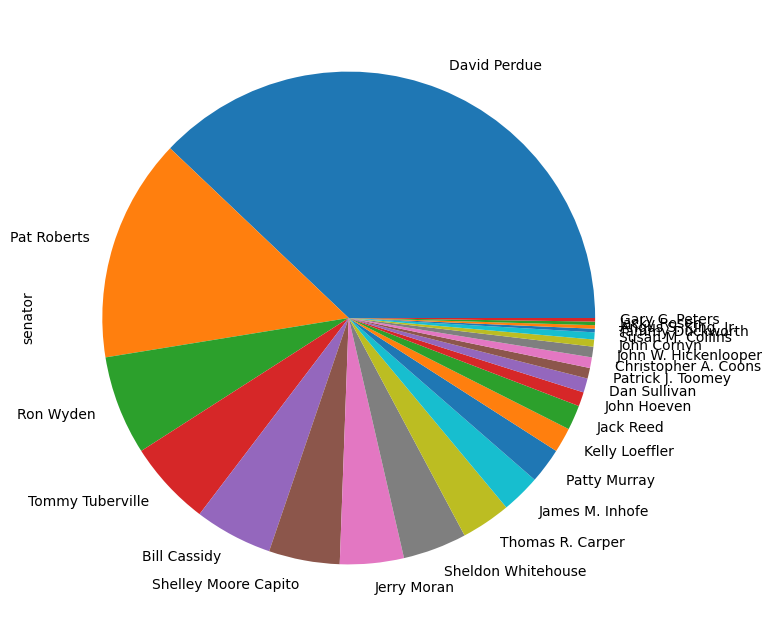

In [27]:
ready_csv_data_indicator['senator'].value_counts().plot(kind='pie', figsize=(8, 8))


In [28]:
ready_csv_data_indicator.groupby('amount').mean()

,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return,indicator
amount,,,,,
"$100,000",0.428571,0.514286,0.428571,0.514286,0.085714
"$15,000",0.521127,0.545775,0.429577,0.464789,0.038732
"$250,000",0.666667,0.555556,0.777778,0.666667,-0.777778
"$50,000",0.437500,0.458333,0.500000,0.500000,0.010417
"$500,000",0.166667,0.333333,0.333333,0.666667,-0.333333


In [29]:
ready_csv_data.head()

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,0.066908,0.128963,0.105514,0.050975
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,0.015675,-0.014124,0.032734,0.249657
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,-0.002417,-0.027021,0.003578,0.271912
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922


In [30]:
ready_csv_data.groupby(['senator', 'type']).mean().sort_values('180_days_excess_return', ascending=False)

,,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
senator,type,,,,
Susan M. Collins,Sale (Full),0.007382,0.085399,0.087995,0.277192
David Perdue,Exchange,0.174117,0.212511,0.227397,0.171020
Jack Reed,Sale (Full),0.064168,0.114760,0.055778,0.159861
James M. Inhofe,Sale (Partial),0.060714,0.051671,0.090284,0.148831
Jack Reed,Purchase,0.080507,0.065276,0.051727,0.145113
Shelley Moore Capito,Sale (Full),0.053383,0.077331,0.080308,0.140984
Jack Reed,Sale (Partial),0.008848,0.059651,0.100621,0.133992
Dan Sullivan,Purchase,-0.029561,-0.009134,0.025283,0.132380
Bill Cassidy,Sale (Partial),0.009449,0.016253,0.023131,0.115518


In [31]:
ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])
ready_csv_data.dtypes

transaction_date          datetime64[ns]
ticker                            object
type                              object
amount                            object
senator                           object
30_days_excess_return            float64
60_days_excess_return            float64
90_days_excess_return            float64
180_days_excess_return           float64
dtype: object

In [32]:
ready_csv_data_indicator.hvplot.bar(x='transaction_date', y='indicator', color='type', width=1000, height=500, cmap=['Red', 'Green', 'Violet', 'Grey'])


:Bars   [transaction_date]   (indicator,type)

In [33]:
display(ready_csv_data_indicator)

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return,indicator
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,False,False,False,False,-1
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,True,False,True,True,1
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,False,False,True,True,1
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,False,True,False,False,-1
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,True,False,True,True,1
...,...,...,...,...,...,...,...,...,...,...
6963,2015-09-16,PFE,Purchase,"$15,000",Gary C. Peters,True,False,False,False,1
7323,2015-04-29,PFE,Sale (Partial),"$15,000",David Perdue,False,True,False,False,-1
7325,2015-05-06,PFE,Sale (Partial),"$15,000",David Perdue,False,True,False,False,-1
7327,2015-05-07,PFE,Sale (Partial),"$15,000",David Perdue,False,True,False,False,-1


In [34]:
ready_csv_data_indicator.plot(kind='pie', y='180_days_excess_return')

TypeError: no numeric data to plot

In [ ]:
data_to_plot.hvplot.bar(x='senator', y='30_days_excess_return', color='type', width=1000, height=500, cmap=['Blue', 'Yellow', 'Orange', 'Red'])

In [35]:
ready_ticker_data.to_csv('/Users/matt/Desktop/senator_trading_performance/ready_ticker_data.csv', index=False)

OSError: Cannot save file into a non-existent directory: '\Users\matt\Desktop\senator_trading_performance'

pie chart compare net positve and negative trades. Groupby type of day.

In [ ]:

ready_csv_data_indicator = ready_csv_data.copy()
indicator_mapping = {'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
# Add a new column 'indicator' based on the mapping from 'type' column
ready_csv_data_indicator['indicator'] = ready_csv_data_indicator['type'].replace(indicator_mapping)
# Perform an operation on the excess return columns based on 'indicator' values
excess_return_columns = ['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']
ready_csv_data_indicator[excess_return_columns] = ready_csv_data_indicator[excess_return_columns].multiply(ready_csv_data['indicator'], axis=0) > 0
# Display the resulting DataFrame
display(ready_csv_data_indicator)